# C2M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Motivate the use of two-way ANOVA through real data analysis examples.

2. Interpret the two-way ANOVA model, with and without interaction terms.

3. Construct and interpret interaction plots to visually assess the importance of an interaction term.

4. Conduct hypothesis tests to decide whether a two-way ANOVA interaction term is statistically significant.

5. Use the two-way ANOVA and ANCOVA models to answer research questions using real data.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(tidyverse)
library(ggplot2) # a package for nice plots!
library(dplyr)
library(emmeans)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Problem 1: e-reader data

In this assignment, we learn to answer our two-way ANOVA research questions through the analysis of real data. We will use the ereader data. The study that generated these data can be found here: [P.-C. Chang, S.-Y. Chou, K.-K. Shieh (2013). "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions," Displays, Vol. 34,
pp. 208-214.](http://users.stat.ufl.edu/~winner/data/ereader1.txt)) 

Electronic paper display devices, such as the Amazon Kindle have changed the way that people read. But has it changed for the better? In a 2013 study titled "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions", researchers set out to ask whether reading speed (a continuous variable) differed across different electronic paper displays. In addition, they were also interested in whether different lighting conditions impacted reading speed. As such, this experiment had one response with two different factors:

1. Device type: three different types.
    1. Sony PRS-700 with a 6-in. display, $800 \times 600$ resolution; 
    2. Amazon Kindle DX with a 9.7-in. display, $1200 \times 824$ resolution; and 
    3. iRex 1000S with a 10.2-in. display, $1024 \times 1280$ resolution.


2. Lighting Condition: four different conditions (200Lx,500Lx, 1000Lx, 1500Lx), Lx = lux, one lumen per square meter


3. Reading Time: measured in seconds.

With these data, we might ask the following **research questions**:

1. Are the effects of device type significant? That is, is there evidence that suggests that individuals read at different speeds based on the device that they are using?


2. Are the effects of lighting conditions significant? That is, is there evidence that suggests that individuals read at different speeds based on the reading lighting conditions?


3. Do device type and lighting conditions *interact*? For example, Suppose that, on average, people can read for longer on device A than on device B, in low light. Is that trend the same in medium light, or bright light? If not, for example, if B is better than A in bright light, then type and lighting interact.

Through this entire analysis, let's set $\alpha = 0.05$. 

**First, let's read in the data, and store the appropriate variables as factors.**

In [2]:
# Load the data
read = read.csv("ereader.txt", sep="\t")

names(read) = c("device", "light", "time")
read$device = as_factor(read$device)
read$light = as.factor(read$light)
read$light = recode(read$light, "1" = "200Lx", "2" = "500Lx", "3" = "1000Lx", "4" = "1500Lx") 

summary(read)

 device    light         time       
 1:19   200Lx :14   Min.   : 543.8  
 2:20   500Lx :15   1st Qu.: 861.4  
 3:20   1000Lx:15   Median :1105.4  
        1500Lx:15   Mean   :1090.2  
                    3rd Qu.:1300.0  
                    Max.   :1797.2  

**1.(a) Construct interaction plots, and visually assess and comment on whether interactions are present.**

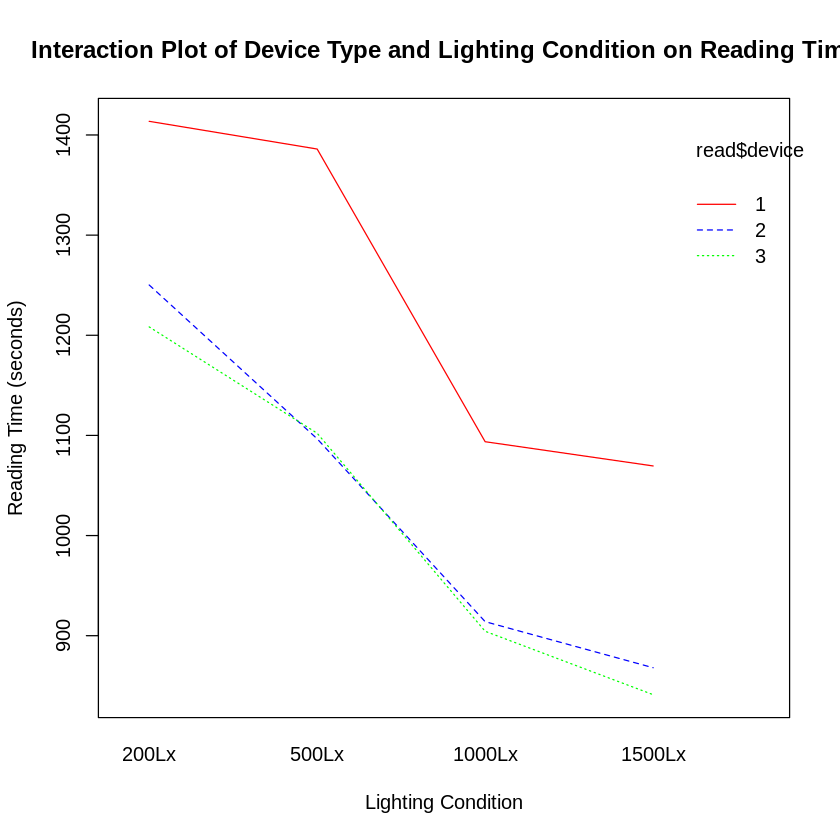

In [3]:
# Construct interaction plots
interaction.plot(read$light, read$device, read$time,
                 col = c("red", "blue", "green"), lty = 1:3, 
                 xlab = "Lighting Condition", ylab = "Reading Time (seconds)", 
                 main = "Interaction Plot of Device Type and Lighting Condition on Reading Time")

**The interaction plot indicates that there is likely an interaction between the device type and lighting conditions on reading time. This means that the impact of lighting conditions on reading speed varies depending on the device being used. For instance, the Sony PRS-700 shows a different pattern of reading times across lighting conditions compared to the Amazon Kindle DX and iRex 1000S.**

**1.(b) Now, let's formally test for an interaction. Fit a model with an interaction, and one without, and conduct an F-test. State the appropriate decision for the test.**

In [4]:
# Fit the full model with interaction
full_model <- lm(time ~ device * light, data = read)

# Fit the reduced model without interaction
reduced_model <- lm(time ~ device + light, data = read)

# Conduct an F-test to compare the models
anova_result <- anova(reduced_model, full_model)
anova_result

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53,3628970,NA,NA,NA,NA
2,47,3603108,6,25861.55,0.05622427,0.9992146


**The effect of device type on reading speed does not significantly depend on the lighting condition, and we can proceed with interpreting the main effects without considering their interaction.**

**1.(c) Before we interpret this model with respect to research question #1 above (just below the data description), let's decide whether the differences that the model reports are statistically significant.**   

**Investigate this question using Bonferroni post hoc comparisons. That is, conduct all pairwise post hoc comparisons for device type using a Bonferroni correction and an overall type I error rate of $\alpha = 0.05$. Comment on the results.**

In [5]:
# Fit the main effects model without interaction
main_effects_model <- lm(time ~ device + light, data = read)

# Conduct pairwise comparisons for device type with Bonferroni correction
pairwise_comparisons <- emmeans(main_effects_model, pairwise ~ device, adjust = "bonferroni")

# Print the pairwise comparison results
print(pairwise_comparisons)

$emmeans
 device emmean   SE df lower.CL upper.CL
 1        1242 60.1 53     1121     1362
 2        1032 58.5 53      915     1150
 3        1014 58.5 53      897     1131

Results are averaged over the levels of: light 
Confidence level used: 0.95 

$contrasts
 contrast estimate   SE df t.ratio p.value
 1 - 2       209.7 83.9 53 2.500   0.0466 
 1 - 3       227.9 83.9 53 2.717   0.0266 
 2 - 3        18.2 82.7 53 0.220   1.0000 

Results are averaged over the levels of: light 
P value adjustment: bonferroni method for 3 tests 



<strong>

- Device 1 vs. Device 2: The mean reading time for Device 1 (Sony PRS-700) is significantly higher than that for Device 2 (Amazon Kindle DX) with a p-value of 0.0466, which is less than 0.05.
- Device 1 vs. Device 3: The mean reading time for Device 1 (Sony PRS-700) is also significantly higher than that for Device 3 (iRex 1000S) with a p-value of 0.0266, which is less than 0.05.
-  Device 2 vs. Device 3: There is no significant difference in mean reading time between Device 2 (Amazon Kindle DX) and Device 3 (iRex 1000S) with a p-value of 1.0000.

These results indicate that individuals read significantly slower on Device 1 (Sony PRS-700) compared to Device 2 (Amazon Kindle DX) and Device 3 (iRex 1000S). However, there is no significant difference in reading speed between Device 2 and Device 3.

</strong>

**1.(d) Using the post hoc comparisons from above, let's focus on research question #1 from above: Are the effects of device type significant? That is, is there any evidence that suggests that individuals read faster or slower based on the device that they are using**

<strong>

Based on the Bonferroni post hoc comparisons:

Are the effects of device type significant?

- Yes, there is evidence to suggest that individuals read at different speeds based on the device that they are using.
- Specifically, the Sony PRS-700 (Device 1) results in significantly slower reading times compared to both the Amazon Kindle DX (Device 2) and the iRex 1000S (Device 3).
- There is no significant difference in reading speeds between the Amazon Kindle DX and the iRex 1000S.

</strong>